# <p style="background-color:lightgray; font-family:verdana; font-size:250%; text-align:center; border-radius: 15px 20px;">🟠Libraries and Data import // First look at Data o.o/🟠</p>

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, kruskal


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ab-test-data/AB_Test_Results.csv
/kaggle/input/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv
/kaggle/input/mobile-games-ab-testing/cookie_cats.csv


# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">A/B Test dataset</p>

In [2]:
df = pd.read_csv("/kaggle/input/ab-test-data/AB_Test_Results.csv")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes: </font></h3>
  
* **USER_ID**: Identification number
* **VARIANT_NAME**: Group membership
* **REVENUE**: Income

In [3]:
df = df.drop_duplicates()

In [4]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [5]:
control = df[df["VARIANT_NAME"]=="control"]
variant = df[df["VARIANT_NAME"]=="variant"]

In [6]:
print(control.shape)
print(variant.shape)

(3973, 3)
(3960, 3)


In [7]:
df.sort_values(by='REVENUE', ascending=False).head(10)

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01
6447,2881,variant,58.63
7642,7206,variant,57.46
9421,6792,control,41.53
8168,2166,control,29.32
9125,831,control,25.98
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
5530,282,control,18.56


In [8]:
df.groupby(by='VARIANT_NAME').agg({'USER_ID': 'nunique',
                                               'REVENUE': ['sum', 'mean', 'median', 'count']})

USER_ID REVENUE                       
             nunique     sum      mean median count
VARIANT_NAME                                       
control         3931  643.00  0.161842    0.0  3973
variant         3934  351.47  0.088755    0.0  3960

<Axes: xlabel='REVENUE', ylabel='Density'>

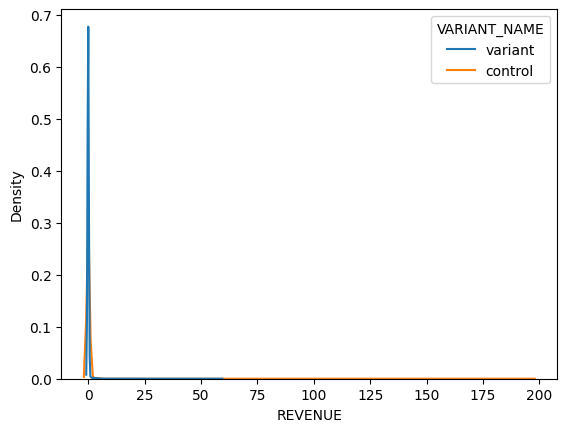

In [9]:
sns.kdeplot(x="REVENUE",data=df,hue= 'VARIANT_NAME')

In [10]:
print(control["REVENUE"].mean())
print(variant["REVENUE"].mean())

0.16184243644601057
0.08875505050505052


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes: </font></h3>
    
According to these numbers, it seems like there may be a difference in revenue between the groups, but this difference could have occurred by chance and should be statistically tested.

**Step 1 - Formulate Hypotheses:**
   - Null Hypothesis (H0): H₀: µ₁ = µ₂ (There is no statistical difference in terms of purchase between the Control and Variant Groups)
   - Alternative Hypothesis (H1): H₁: µ₁ ≠ µ₂ (There is a statistical difference between the Control and Variant Groups in terms of Revenue)

**Step 2 - Assumption Checks:**
   - Normality Assumption
   - Homogeneity of Variance

**Step 3 - Normality Assumption Hypothesis:**
   - H0: The normal distribution assumption is met.
   - H1: The normal distribution assumption is not met.
    
**Step 4 - Assumption of Homogeneity of Variance:**
   - H0: Variances are homogenous.
   - H1: Variances are not homogenous.

In [11]:
test_stat, pvalue = shapiro(variant["REVENUE"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0327, p-value = 0.0000


In [12]:
test_stat, pvalue = shapiro(control["REVENUE"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0220, p-value = 0.0000


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes: </font></h3>
    
* Normality assumption cannot be assumed, we need to proceed with the Mann-Whitney test without considering the homogeneity of distribution

In [13]:
test_stat , pvalue = mannwhitneyu((control['REVENUE']),
                                  (variant['REVENUE']))

print('Test stat = %.4f , p-value = %.4f' % (test_stat, pvalue))

Test stat = 7882388.0000 , p-value = 0.5129


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>
    
* H0 cannot be rejected, there is no statistical difference between them.

# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Fast-food marketing campaign A/B Test </p>

In [14]:
df2 = pd.read_csv("/kaggle/input/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv")

In [15]:
df2.head().T

,0,1,2,3,4
MarketID,1,1,1,1,1
MarketSize,Medium,Medium,Medium,Medium,Medium
LocationID,1,1,1,1,2
AgeOfStore,4,4,4,4,5
Promotion,3,3,3,3,2
week,1,2,3,4,1
SalesInThousands,33.73,35.67,29.03,39.25,27.81


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>👀 Features: </font></h3>
    
* MarketID: unique identifier for market
* MarketSize: size of market area by sales
* LocationID: unique identifier for store location
* AgeOfStore: age of store in years
* Promotion: one of three promotions that were tested
* week: one of four weeks when the promotions were run
* SalesInThousands: sales amount for a specific LocationID, Promotion, and week

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>
    
* We can observe that the Promotion averages are close to each other, and similarly, the promotion averages are also close. However, there is a difference between them. But did this difference occur by chance? It needs to be statistically proven.

1. The ANOVA hypotheses for four groups:

    * H0: μ1 = μ2 = μ3 = μ4: The means of all groups are equal.
    * H1: At least one group is different from the others.

These hypotheses are used to test whether the average difference among the four groups is statistically significant. If H0 is rejected, at least one group is different from the others, and the ANOVA analysis identifies this difference.

2. Assumption Checks:

   - Normality Assumption
   - Homogeneity of Variance
   
* If the assumption is met: **One Way Anova**
* If the assumption is not met: **Kruskal**

In [16]:
for group in list(df2["Promotion"].unique()):
    pvalue = shapiro(df2.loc[df2["Promotion"] == group, "SalesInThousands"])[1]
    print(group, 'p-value: %.4f' % pvalue)

3 p-value: 0.0000
2 p-value: 0.0000
1 p-value: 0.0000


In [17]:
s,p = kruskal(df2.loc[df2["Promotion"] == 1, "SalesInThousands"],
        df2.loc[df2["Promotion"] == 2, "SalesInThousands"],
        df2.loc[df2["Promotion"] == 3, "SalesInThousands"])
print(f"\nStatistic: {s:.3f}\np-Value: {p:.3f}\n")


Statistic: 53.295
p-Value: 0.000



<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>
    
* The p-value for the hypothesis of equality of promotions is less than 0.05; therefore, we reject the null hypothesis, indicating that the assumption of equality is not satisfied.
    
* In Addition to this, we can check the  difference amoung beetwen these groups in below.

In [18]:
from statsmodels.stats.multicomp import  MultiComparison
comparison = MultiComparison(df2["SalesInThousands"], df2["Promotion"])
tukey = comparison.tukeyhsd(0.05)
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3> 
    
* We cannot reject the similarity between 1 and 3; the similarity between 1 and 2  also 2 and 3 is rejected.

# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Mobile games A/B test</p>

In [19]:
df3 = pd.read_csv("/kaggle/input/mobile-games-ab-testing/cookie_cats.csv")

In [20]:
df3.head().T

,0,1,2,3,4
userid,116,337,377,483,488
version,gate_30,gate_30,gate_40,gate_40,gate_40
sum_gamerounds,3,38,165,1,179
retention_1,False,True,True,False,True
retention_7,False,False,False,False,True


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>👀 Features: </font></h3>
    
- **userid:** Unique identifier for each user.
- **version:** Whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
- **sum_gamerounds:** The total number of game rounds played by the user.
- **retention_1:** Whether the user retained after 1 day from installation (binary: 1 for retained, 0 for not retained).
- **retention_7:** Whether the user retained after 7 days from installation (binary: 1 for retained, 0 for not retained).

In [21]:
df3.groupby('version').agg({"sum_gamerounds": ["count", "mean"]})

sum_gamerounds           
                 count       mean
version                          
gate_30          44700  52.456264
gate_40          45489  51.298776

In [22]:
df3.version.value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

In [23]:
sms.DescrStatsW(df3["sum_gamerounds"]).tconfint_mean()

(50.59946671311376, 53.14544674639904)

In [24]:
sample = df3.sample(n=9000,random_state=42)
sample["sum_gamerounds"].mean()

51.279

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3> 
    
* Shapiro-Wilk test cannot be performed with a sample size over 5000. It requires observation units within sample sizes below 5000. Hence, I calculated the confidence interval from 9000 observation units and obtained a sample that fits within this confidence interval.

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>🔍 Hypotesis</font></h3>

* **H₀: µ₁ = µ₂** (There is no statistical difference in terms of game rounds between the versions)
    
* **H₁: µ₁ ≠ µ₂** (There is statistical difference in terms of game rounds between the versions)

In [25]:
for ver in sample["version"].unique():
    s,p = shapiro(sample.loc[sample['version']==ver,"sum_gamerounds"])
    print(f"Version: {ver} \nStatistic: {s:.3f}\np-Value: {p:.3f}\n")

Version: gate_30 
Statistic: 0.497
p-Value: 0.000

Version: gate_40 
Statistic: 0.479
p-Value: 0.000



<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes: </font></h3>
    
* Normality assumption cannot be assumed, we need to proceed with the Mann-Whitney test without considering the homogeneity of distribution

In [26]:
s,p = mannwhitneyu(sample.loc[sample['version']=="gate_30","sum_gamerounds"],
             sample.loc[sample['version']=="gate_40","sum_gamerounds"])
print(f"\nStatistic: {s:.3f}\np-Value: {p:.3f}\n")


Statistic: 10177266.500
p-Value: 0.665



<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes: </font></h3>
    
* According to the Mann-Whitney U test, H0 cannot be rejected. There is no significant difference between the means of the two groups.